read in files

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy as sp
import glob

def collect_subject_id_from_folder(folder_in: str) -> str:
    """
    Determine the subject id from the input TEWL file name which has the format:

    """
    subject_id = folder_in.split("/")[-1].split("_")[0]
    return subject_id

def collect_subject_id_return_from_folder(folder_in: str) -> str:
    """
    Determine the subject id from the input TEWL file name which has the format:

    """
    subject_id = folder_in.split("/")[-1].split("_")[1]
    if subject_id == "2":
        return True
    else:
        return False

def collect_subject_id_scan_information(file_in: str) -> str:
    """
    Determine the subject id from the input TEWL file name which has the format:

    """
    subject_id = file_in.split("/")[-1].split("_")[2]
    return subject_id


def collect_data_location(file_in: str) -> str:
    """
    Determine the subject id from the input TEWL file name which has the format:

    """
    location = file_in.split("/")[-1].split("_")[2]
    return location

def collect_scan_id(file_in: str) -> str:
    """
    Determine the subject id from the input TEWL file name which has the format:

    """
    scan_id = file_in.split("/")[-1].split("_")[3]
    if "L" in scan_id:
        scan_id = file_in.split("/")[-1].split("_")[4]
    return int(scan_id[1:])

def collect_arm_id_from_file(file_in: str) -> int:
    """
    
    """
    arm_id = file_in.split("/")[-1].split(".")[0].split("_")[1].split(" ")[0]
    
    return arm_id


class Scan:
    def __init__(self, scan_id, plexus_data, bloodflow_depth_data, arm = None, location = None, post_exposure = None, return_visit = None):
        self.scan_id = scan_id
        self.plexus_data = plexus_data
        self.bloodflow_depth_data = bloodflow_depth_data
        self.arm = arm
        self.location = location
        self.post_exposure = post_exposure
        self.return_visit = return_visit

class Epidermal:
    def __init__(self, scan_id, depth_data, summary_data,location, return_visit):
        self.scan_id = scan_id
        self.depth_data = depth_data
        self.summary_data = summary_data
        self.location = location
        self.return_visit = return_visit

class SkinRoughness:
    def __init__(self, scan_id, Ra, Rq, Rz,location, return_visit):
        self.scan_id = scan_id
        self.Ra = Ra
        self.Rq = Rq
        self.Rz= Rz
        self.location = location
        self.return_visit = return_visit

class BloodFlow:
    def __init__(self, scan_id, plexus_depth, bloodflow_depth_data, location, return_visit):
        self.scan_id = scan_id
        self.plexus_depth = plexus_depth
        self.bloodflow_depth_data = bloodflow_depth_data
        self.location = location
        self.return_visit = return_visit

class Subject:
    def __init__(self, subject_id):
        self.subject_id = subject_id
        self.scans = None
        self.skin_roughness = None
        self.epidermal = None
        self.blood_flow = None
        self.num_scans = 0
        self.num_skin_roughness = 0
        self.num_epidermal = 0
        self.num_blood_flow = 0
    
    def add_skin_roughness(self, scan_id, Ra, Rq, Rz,location, return_visit):
        """
       skin roughness function
        """
        if self.skin_roughness is None:
            self.skin_roughness = []
        
        self.skin_roughness.append(
            SkinRoughness(scan_id=scan_id,Ra = Ra, Rq = Rq, Rz = Rz,location=location, return_visit = return_visit)
            )
        
        self.num_skin_roughness += 1

    def add_epidermal(self, scan_id, depth_data, summary_data,location, return_visit):
        """
        epidermal data function
        """
        if self.epidermal is None:
            self.epidermal = []
        
        self.epidermal.append(
            Epidermal(scan_id=scan_id,depth_data = depth_data, summary_data = summary_data, location=location, return_visit=return_visit)
            )
        
        self.num_epidermal += 1

    def add_blood_flow(self, scan_id, plexus_depth, bloodflow_depth_data,location, return_visit):
        """
        blood flow data function
        """
        if self.blood_flow is None:
            self.blood_flow = []
        
        self.blood_flow.append(
            BloodFlow(scan_id=scan_id, plexus_depth = plexus_depth,
                      bloodflow_depth_data = bloodflow_depth_data,location = location, return_visit=return_visit)
            )
        
        self.num_blood_flow += 1

    def add_scan(self, scan_id, location=None, arm=None, post_exposure=None, return_visit=None):
        """_summary_

        Args:
            visit_id (_type_): _description_
            return_visit (_type_): _description_
            data (_type_): _description_
        """
        if self.scans is None:
            self.scans = []

        self.scans.append(Scan(scan_id=scan_id,
                           arm=arm, 
                           location=location, 
                           post_exposure=post_exposure, return_visit=return_visit))
        self.num_scans += 1

read in all Vivosight data

In [50]:
### Get a list of all files
vivosight_subject_data = glob.glob("../data/Vivosight_data/*")

# initialize data
subject_ids = []
subject_data = {}
test_data = [vivosight_subject_data[0]]

# Grab epidermal data for each subject
for folder in test_data:
    subject_id = collect_subject_id_from_folder(folder)
    return_visit = collect_subject_id_return_from_folder(folder)
    print(subject_id,return_visit, folder)

    if subject_id not in subject_data:
        subject_data[subject_id] = Subject(subject_id=subject_id)

    data_types_folders = glob.glob(folder+"/*") 
    for data_type_folder in data_types_folders:
        if "Epidermal" in data_type_folder:# or "Blood Flow" in data_type_folder or "Skin Roughness" in data_type_folder:
            data_files = glob.glob(data_type_folder+"/*.csv") 
            for data_file in data_files:
                location = collect_data_location(data_file)
                scan_id = collect_scan_id(data_file)
                arm = collect_arm_id_from_file(data_file)
                
                # Read data
                try:
                    if "Epidermal" in data_type_folder:
                        depth_data = pd.read_csv(data_file,header=6,encoding='latin1')
                        summary_data = pd.read_csv(data_file,header=0,nrows=5, encoding='latin1')
                        subject_data[subject_id].add_epidermal(scan_id=scan_id,depth_data=depth_data, summary_data = summary_data,location=location, return_visit=return_visit)
                    elif "Blood Flow" in data_type_folder:
                        bloodflow_depth_data = pd.read_csv(data_file, header=1, encoding='latin1')
                        plexus_data = pd.read_csv(data_file, header=0, nrows=0, encoding='latin1')
                        plexus_data = float(plexus_data.columns[1].split(" ")[0])
                        subject_data[subject_id].add_blood_flow(scan_id=scan_id, bloodflow_depth_data=bloodflow_depth_data, plexus_depth=plexus_data, location=location, return_visit=return_visit)
                        
                    elif "Skin Roughness" in data_type_folder:
                        roughness_data = pd.read_csv(data_file, header= None, encoding='latin1')
                        Ra = roughness_data.iloc[0,1]
                        Rz = roughness_data.iloc[1,1]
                        Rq = roughness_data.iloc[2,1]
                        subject_data[subject_id].add_skin_roughness(
                            scan_id=scan_id, Ra=Ra, Rq=Rq, Rz=Rz,location=location, return_visit=return_visit
                            )

                except Exception as e:
                    print(f"Error reading {data_file}: {e}")

A52 True ../data/Vivosight_data/A52_2_Results


read in all scan ID's, location, and exposure status from surface area calculation excel files 

In [51]:
### Get a list of all scan information files
scan_info_subject_data = glob.glob("../data/scan_information/*")

subject_info_data = {}

# Grab data for each subject
for file in scan_info_subject_data:
    subject_id = collect_subject_id_scan_information(file)
    print(subject_id)
    try:
        data_before_exp = pd.read_excel(file, 'Surface Area_AE')
        data_after_exp = pd.read_excel(file, 'Surface Area_BE')
    except Exception as reason:
        data_before_exp = None
        data_after_exp = None
        print(
                f"There is an issue with \t {file}. \t This data will be excluded from the analysis. Reason: {reason}"
            )

    # print(data_before_exp)    
    b_scan_id = data_before_exp["Scan#"].dropna()
    b_location = data_before_exp["Location"].dropna()

    a_scan_id = data_after_exp["Scan#"].dropna()
    a_location = data_after_exp["Location"].dropna()    

    if subject_id in subject_info_data:
        subject_info_data[subject_id]["before_scan_id"].extend(list(b_scan_id))
        subject_info_data[subject_id]["before_location"].extend(list(b_location))
        subject_info_data[subject_id]["after_scan_id"].extend(list(a_scan_id))
        subject_info_data[subject_id]["after_location"].extend(list(a_location))
    else:
        subject_info_data[subject_id] = {
            "before_scan_id":list(b_scan_id), 
            "before_location":list(b_location), 
            "after_scan_id": list(a_scan_id),
            "after_location":list(a_location)
            }


print(subject_info_data)

W40
B05
Z47
A52
Y20
G07
N64
B05
A52
L81
L81
R98
E11
P38
L71
S88
C14
F12
U34
M16
L71
D47
R09
R98
T98
U34
E50
G07
M16
{'W40': {'before_scan_id': [988.0, 989.0, 990.0, 991.0, 992.0, 993.0, 995.0, 997.0, 998.0, 999.0, 1000.0, 1001.0], 'before_location': [1249.0, 1249.0, 1249.0, 1250.0, 1250.0, 1250.0, 1251.0, 1251.0, 1251.0, 1252.0, 1252.0, 1252.0], 'after_scan_id': [974.0, 975.0, 976.0, 977.0, 978.0, 979.0, 981.0, 982.0, 983.0, 985.0, 986.0, 987.0], 'after_location': [1249.0, 1249.0, 1249.0, 1250.0, 1250.0, 1250.0, 1251.0, 1251.0, 1251.0, 1252.0, 1252.0, 1252.0]}, 'B05': {'before_scan_id': [1261.0, 1262.0, 1263.0, 1264.0, 1265.0, 1266.0, 1267.0, 1268.0, 1269.0, 1270.0, 1271.0, 1272.0, 1473.0, 1474.0, 1475.0, 1476.0, 1478.0, 1479.0, 1480.0, 1481.0, 1482.0, 1483.0, 1484.0, 1485.0], 'before_location': [1299.0, 1299.0, 1299.0, 1300.0, 1300.0, 1300.0, 1301.0, 1301.0, 1301.0, 1302.0, 1302.0, 1302.0, 1335.0, 1335.0, 1335.0, 1336.0, 1336.0, 1336.0, 1337.0, 1337.0, 1337.0, 1338.0, 1338.0, 1338.0],

creating graphs for epidermal data

A52 <__main__.Epidermal object at 0x11f7f28a0>
A52 1321 1.4829452033210557 0.1343559294912012


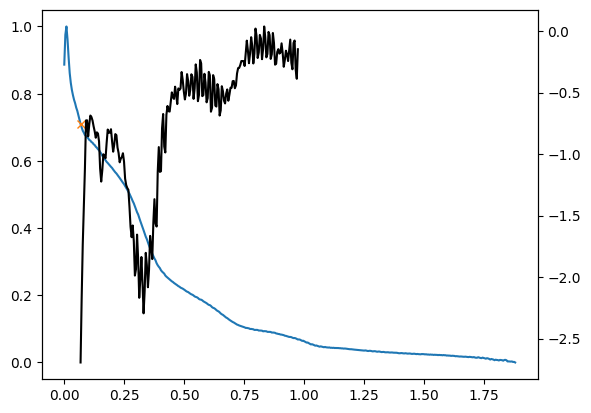

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123193830>
A52 1321 1.5616856053581434 0.13502075419185422
location Found at 0.0816


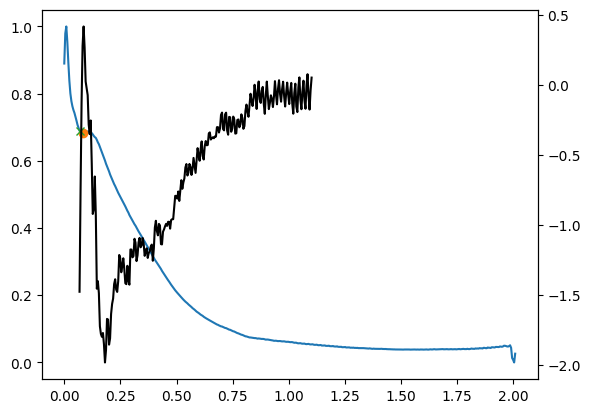

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123a6b410>
A52 1321 1.29757855621678 0.15029161346900777
location Found at 0.0770667


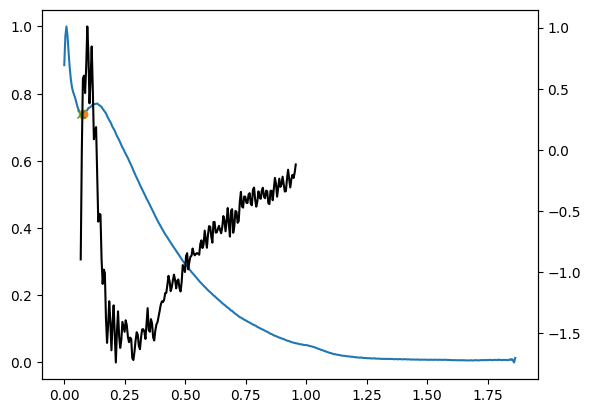

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x12310ba70>
A52 1321 1.4705882352941175 0.14462087345583097
location Found at 0.0952


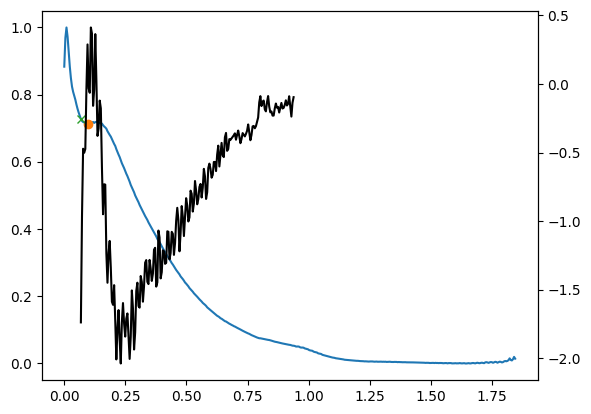

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x1231c6390>
A52 1321 1.4005602240896358 0.1377483509340412
location Found at 0.0770667


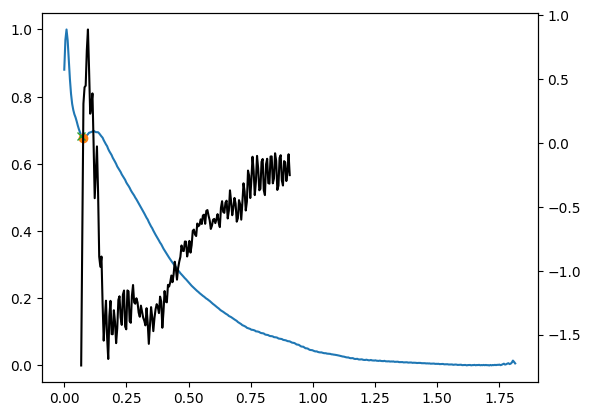

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123ccafc0>
A52 1321 1.5345278353758538 0.13542877336533804
location Found at 0.0816


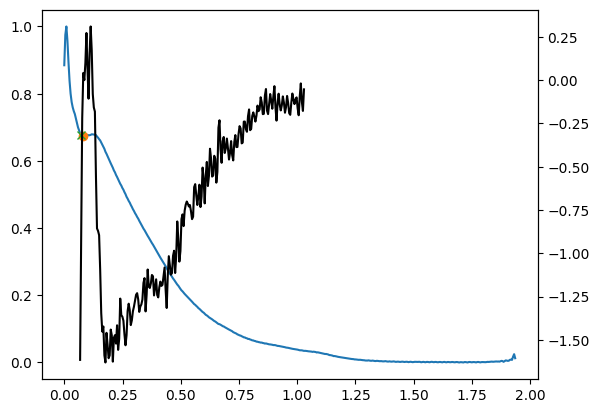

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123dc7020>
A52 1321 1.2427512648877719 0.1551908258702878
location Found at 0.0770667


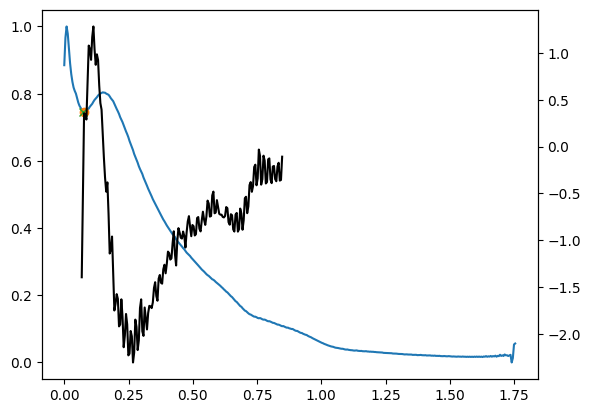

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123a39340>
A52 1321 1.2695732488220741 0.13879064717935777


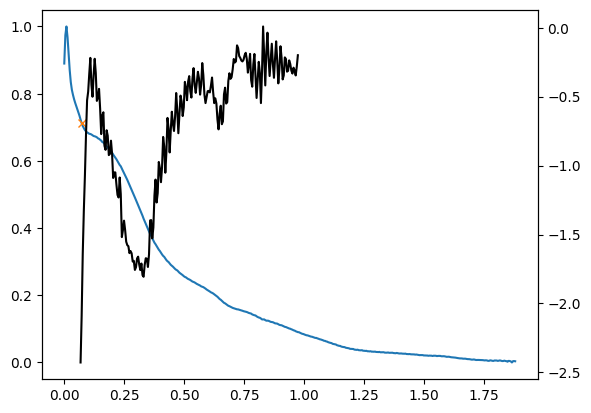

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x1234117f0>
A52 1321 1.3471029708672144 0.13284624991118457


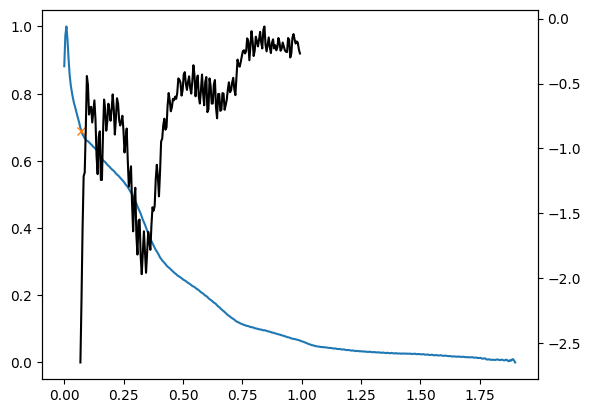

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123ccab40>
A52 1321 1.6189973144882046 0.13295599398955288
location Found at 0.0770667


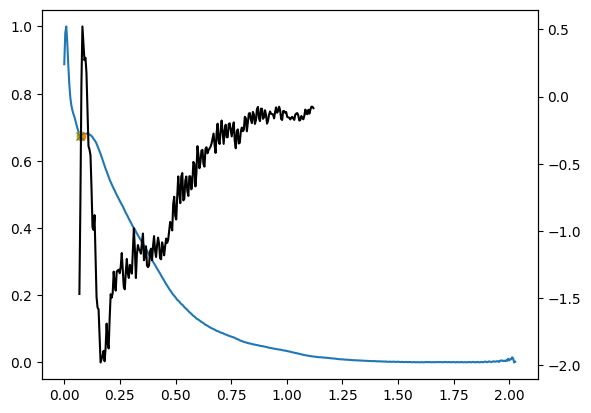

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123d10320>
A52 1321 1.3071895424836601 0.14123931879025703
location Found at 0.0770667


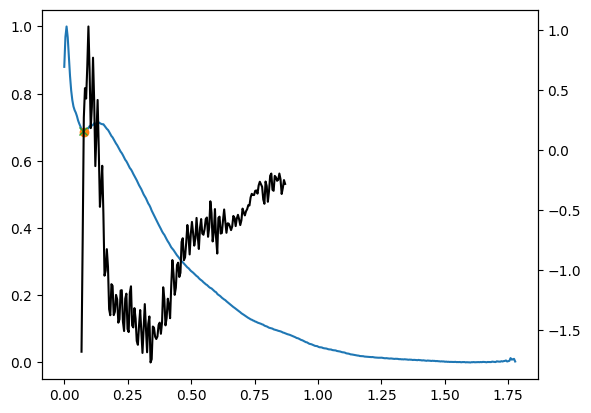

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123d11b20>
A52 1321 1.4705882352941175 0.14649037328551237
location Found at 0.0770667


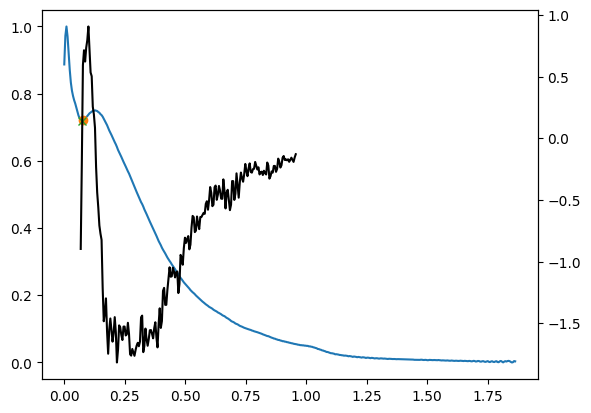

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123dc4a40>
A52 1321 1.5212972101310789 0.1462440456177596
location Found at 0.131467


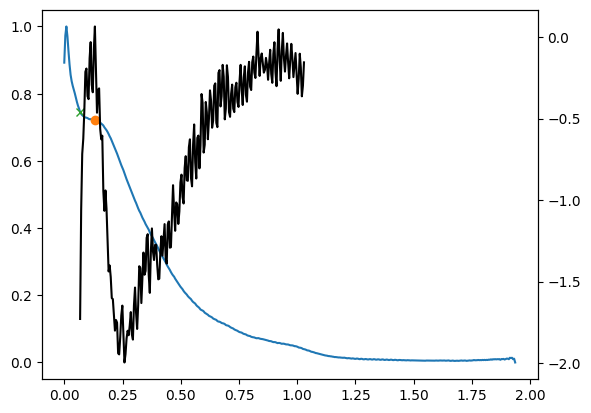

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x122f75430>
A52 1321 1.278772378516624 0.15179059664108907
location Found at 0.0906667


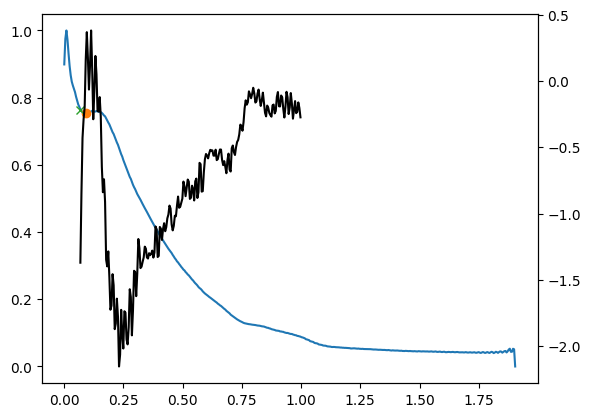

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x122f74950>
A52 1321 1.4117638754330144 0.13871283207012347
location Found at 0.0816


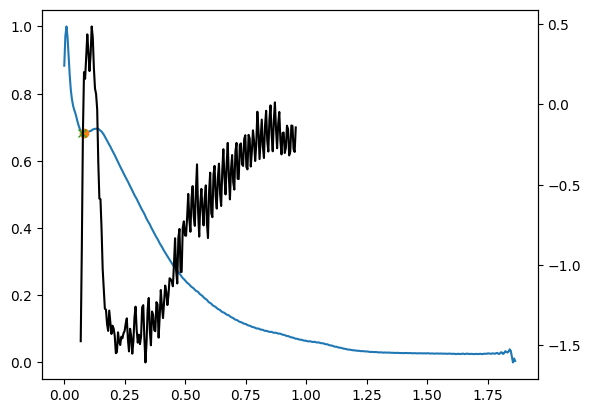

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123343380>
A52 1321 1.2254901960784315 0.13868573160413775


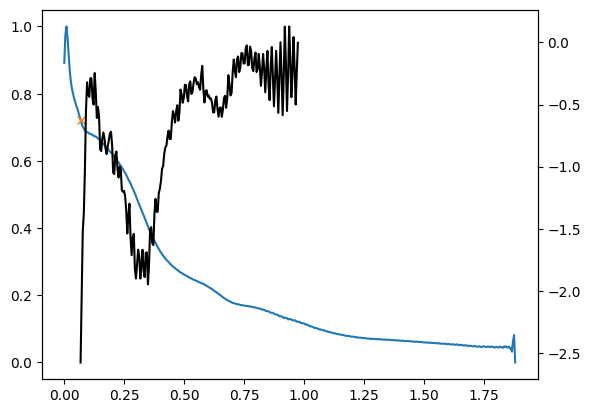

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x122b4cad0>
A52 1321 1.2170391567135685 0.13715800958022661


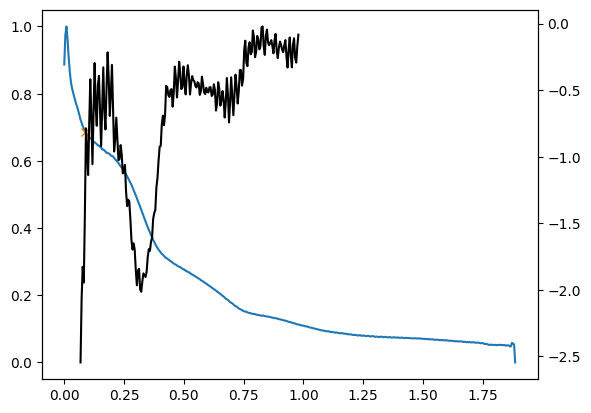

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x122b4ec00>
A52 1321 1.3071895424836601 0.1505243470339644
location Found at 0.0861333


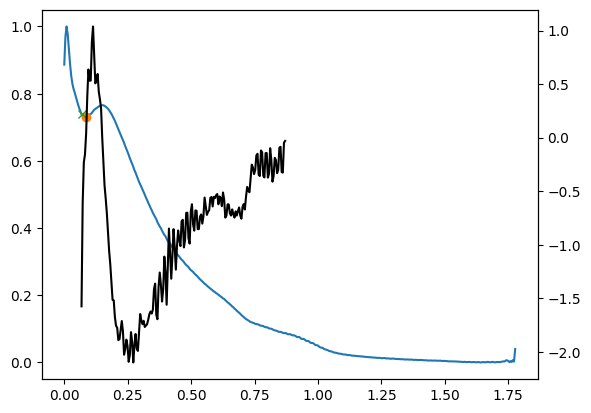

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x1233439e0>
A52 1321 1.278772378516624 0.13734355534058923


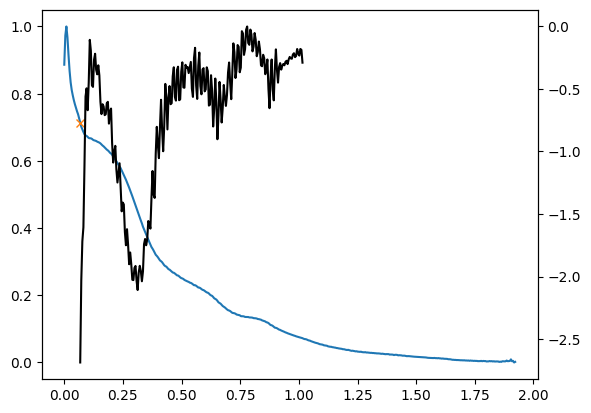

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123343260>
A52 1321 1.4705882352941175 0.13581442640528552
location Found at 0.0906667


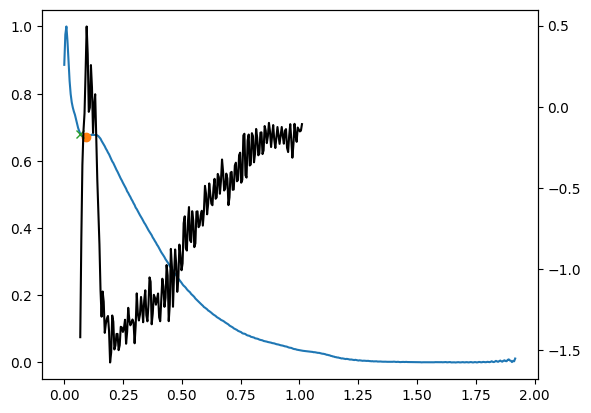

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123341ee0>
A52 1321 1.6648180249847566 0.13301655188674696
location Found at 0.0816


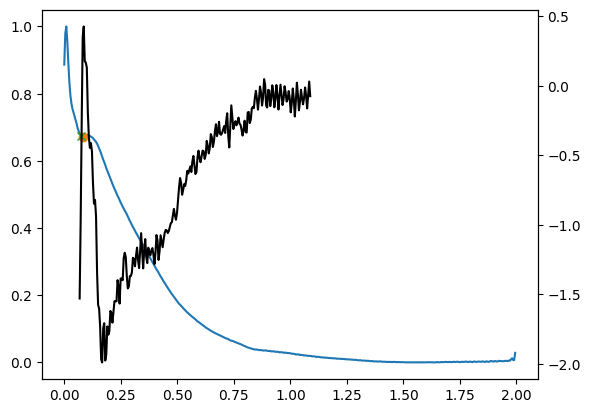

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x123343e60>
A52 1321 1.4347202295552368 0.14584112156198734
location Found at 0.0770667


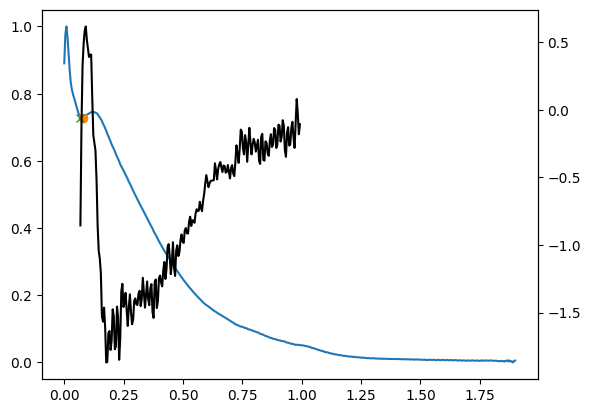

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x122fb8fe0>
A52 1321 1.3368983957219251 0.13940192976227442
location Found at 0.0770667


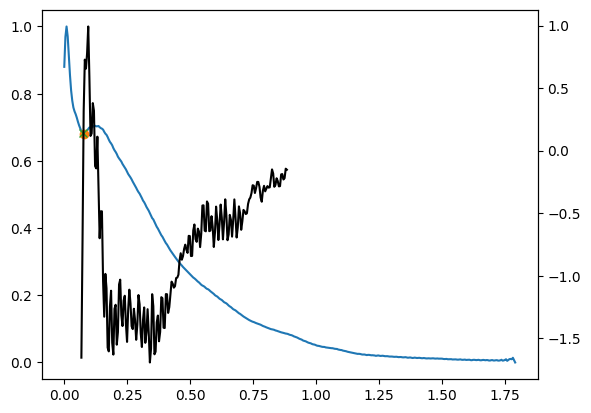

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel
A52 <__main__.Epidermal object at 0x122fbbf20>
A52 1321 1.4705882352941175 0.1462150973910154
location Found at 0.0906667


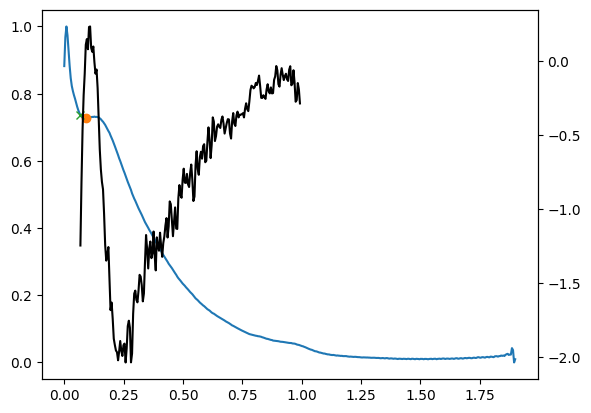

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data successfully exported to Excel


In [92]:
data = []  # empty list to store results
n = 0
for subject_id, subject in subject_data.items():
    if subject_id == "A52":
        for scan in subject.epidermal:

            exposed = None
            if scan.scan_id in subject_info_data[subject_id]['before_scan_id']:
                exposed = False
            elif scan.scan_id in subject_info_data[subject_id]['after_scan_id']:
                exposed = True

            print(subject_id,scan)

            # Find the max value of the "Mean A-scan"
            max_value = scan.depth_data["Mean A-scan"].max()
            min_value = scan.depth_data["Mean A-scan"].min()
            
            # Depth
            depth_at_max_intensity = scan.depth_data["Depth"][scan.depth_data["Mean A-scan"].idxmax()]
            normalized_ascan = (scan.depth_data["Mean A-scan"] - min_value)/(max_value - min_value)

            value = 0.2
            index = abs(normalized_ascan - value).idxmin()
            attenuation_depth  = scan.depth_data["Depth"].iloc[index]
            sid = 0.8/attenuation_depth

            integration_depth = 0.2
            lower_bound_index = scan.depth_data["Mean A-scan"].idxmax()
            upper_bound_index = abs(scan.depth_data["Depth"] - (depth_at_max_intensity + integration_depth)).idxmin()
            AuC = sp.integrate.trapezoid(normalized_ascan[lower_bound_index:upper_bound_index],scan.depth_data["Depth"][lower_bound_index:upper_bound_index])

            data.append([subject_id, scan_id, sid, AuC, exposed])

            print(subject_id,scan_id,sid,AuC)

            pd.set_option('display.max_rows',10000)
            # print(normalized_ascan)
            # print(scan.depth_data["Depth"])

            fig, ax1 = plt.subplots() 
            ax2 = ax1.twinx()        
            ax1.plot(
                scan.depth_data["Depth"],
                normalized_ascan,
                label="Mean A-Scan",
            )

            n_points = len(normalized_ascan)
            locations = scan.depth_data["Depth"]
            test_data = normalized_ascan
            derivative = np.zeros_like(test_data)
            second_derivative = np.zeros_like(test_data)

            for n in range(1, n_points-1):
                h = locations[n]- locations[n-1]
                derivative[n] = (test_data[n+1] - test_data[n-1])/(locations[n+1]- locations[n-1])
                second_derivative[n] = (test_data[n+1] - 2*test_data[n] + test_data[n-1])/(h*h)


            begin_skip = 15
            end_skip = 200


            # Approach 1
            old_value = derivative[begin_skip]
            min_location_index = None
            for n in range(begin_skip+1,98):
                new_value = derivative[n]
                if old_value < 0 and new_value > 0:
                    min_location_index = n
                    print(f"location Found at {locations[n]}")
                    break
                else:
                    old_value = new_value
                    
            if min_location_index is not None:
                ax1.plot(locations[min_location_index],test_data[min_location_index],'o')


            #Approach 2
            diff = np.diff(derivative[begin_skip:n_points-end_skip])
            min_index_2 = begin_skip + np.argmax(diff)

            ax1.plot(locations[min_index_2],test_data[min_index_2],'x')

            # plt.plot(locations, test_data, '.')

            ax2.plot(locations[begin_skip:n_points-end_skip], derivative[begin_skip:n_points-end_skip],'k')
            plt.show()
            # plt.plot(
            #     scan.depth_data["Depth"],
            #     scan.depth_data["Fit Curve"]/max_value,
            #     label="Fit Curve",
            # )

            # Mark the max value on the plot
            # ax.plot(max_depth, max_value, 'ro')  # Red dot at the max value
            # ax.text(max_depth, max_value, f"Max: {max_value:.2f}", color='red', fontsize=10, ha='left')

            #plt.xticks(visible=False)

            if exposed:
                plt.title(f'Subject id: {subject_id}  Scan id: {scan.scan_id} Post-Exposure')
            else:
                plt.title(f'Subject id: {subject_id}  Scan id: {scan.scan_id} Pre-Exposure')
            plt.ylim(bottom=0)
            plt.ylabel("Intensity")
            plt.xlabel("Depth (mm)")
            plt.xlim(0,2)
            plt.legend() 
            plt.savefig(f"../data_out/epidermal_data_out/subject_id_{subject_id}_scan_id_{scan.scan_id}.pdf")
            plt.close()

            if data:  # Only create dataframe if there is data
                df = pd.DataFrame(data, columns=["Subject ID", "Scan ID", "SID", "AuC", "Exposure Status"])
                df.to_excel("../data_out/epidermal_results.xlsx", index=False)
                print("Data successfully exported to Excel")
            else:
                print("No data was collected")

derivative practice

location Found at 4.759988869075444


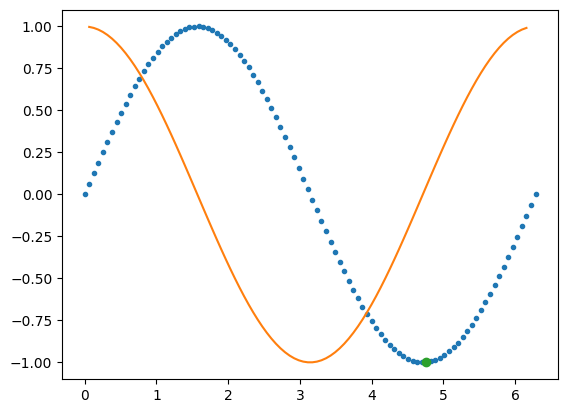

In [75]:
n_points = 100
locations = np.linspace(0,2*np.pi,n_points)
test_data = np.sin(locations)
derivative = np.zeros_like(test_data)
second_derivative = np.zeros_like(test_data)

for n in range(1,n_points-1):
    h = locations[n] - locations[n-1]
    derivative[n] = (test_data[n+1] - test_data[n-1])/(locations[n+1]- locations[n-1])
    second_derivative[n] = (test_data[n+1] - 2*test_data[n] + test_data[n-1])/(h*h)

plt.plot(locations,test_data,'.')
plt.plot(locations[1:98],derivative[1:98])

old_value = derivative[1]
for n in range(2,98):
    new_value = derivative[n]

    if old_value < 0 and new_value > 0:
        min_location_index = n
        print(f"location Found at {locations[n]}")
        old_value = new_value
    else:
        old_value = new_value

plt.plot(locations[min_location_index],test_data[min_location_index],'o')

# plt.plot(locations[1:98],second_derivative[1:98],'k')

# The derivative of sin is cos so a great check! 
# plt.plot(locations,np.cos(locations))
plt.show()


# n_points = len(scan.depth_data["Mean A-scan"])
# locations = scan.depth_data["Depth"]
# test_data = scan.depth_data["Mean A-scan"]
# derivative = np.zeros_like(test_data)
# second_derivative = np.zeros_like(test_data)

# for n in range(1, n_points-1):
#     h = locations[n] - locations[n-1]
#     derivative[n] = (test_data[n+1] - test_data[n-1])/(locations[n+1]- locations[n-1])
#     second_derivative[n] = (test_data[n+1] - 2*test_data[n] + test_data[n-1])/(h*h)

# plt.plot(locations, test_data, '.')
# plt.plot(locations[1:n_points-2], derivative[1:n_points-2])
# plt.plot(locations[1:n_points-2], second_derivative[1:n_points-2])
# plt.show()